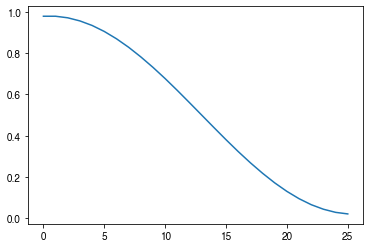

[ 0.97899878  0.97899878  0.97899878  0.97899878  0.97899878  0.97899878
  0.97899878  0.97899878  0.97899878  0.97899878]


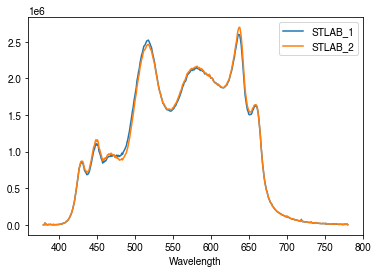

[ 0.97899878  0.97899878  0.97899878  0.97899878  0.97899878  0.97899878
  0.97899878  0.97899878  0.97899878  0.97899878]


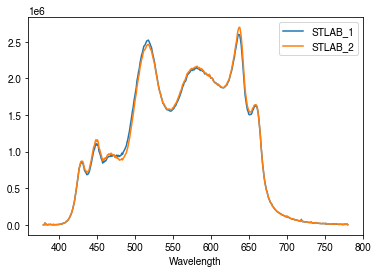

[ 0.97142857  0.97142857  0.97142857  0.97142857  0.97142857  0.97142857
  0.97142857  0.97142857  0.97142857  0.97142857]


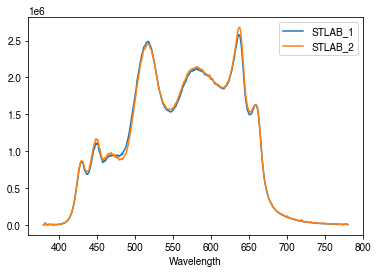

[ 0.95628816  0.95628816  0.95628816  0.95628816  0.95628816  0.95628816
  0.95628816  0.95628816  0.95628816  0.95628816]


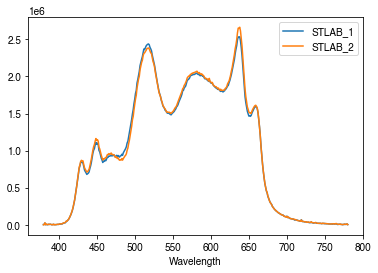

[ 0.93431013  0.93431013  0.93431013  0.93431013  0.93431013  0.93431013
  0.93431013  0.93431013  0.93431013  0.93431013]


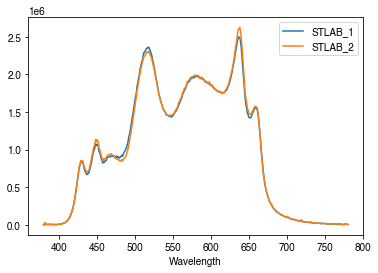

[ 0.90525031  0.90525031  0.90525031  0.90525031  0.90525031  0.90525031
  0.90525031  0.90525031  0.90525031  0.90525031]


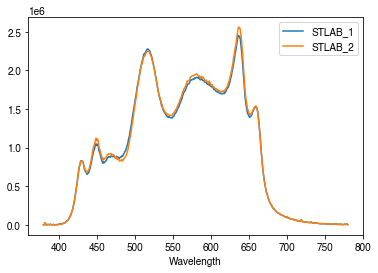

[ 0.86984127  0.86984127  0.86984127  0.86984127  0.86984127  0.86984127
  0.86984127  0.86984127  0.86984127  0.86984127]


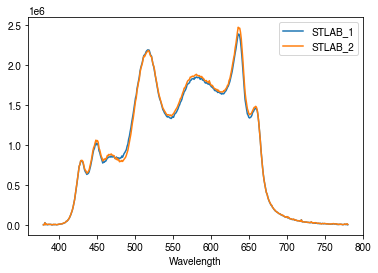

[ 0.82857143  0.82857143  0.82857143  0.82857143  0.82857143  0.82857143
  0.82857143  0.82857143  0.82857143  0.82857143]


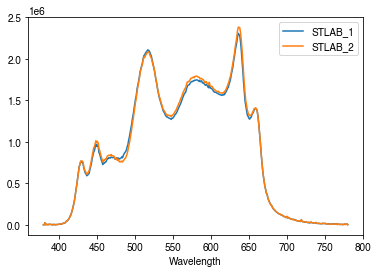

[ 0.78192918  0.78192918  0.78192918  0.78192918  0.78192918  0.78192918
  0.78192918  0.78192918  0.78192918  0.78192918]


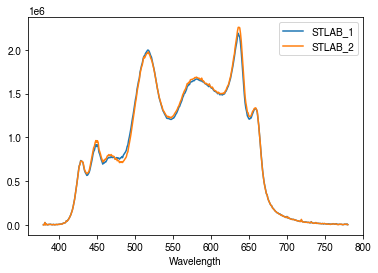

[ 0.73113553  0.73113553  0.73113553  0.73113553  0.73113553  0.73113553
  0.73113553  0.73113553  0.73113553  0.73113553]


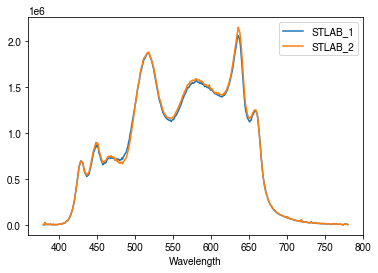

[ 0.67667888  0.67667888  0.67667888  0.67667888  0.67667888  0.67667888
  0.67667888  0.67667888  0.67667888  0.67667888]


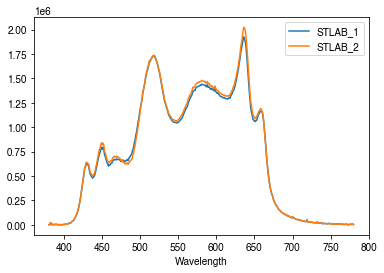

[ 0.61929182  0.61929182  0.61929182  0.61929182  0.61929182  0.61929182
  0.61929182  0.61929182  0.61929182  0.61929182]


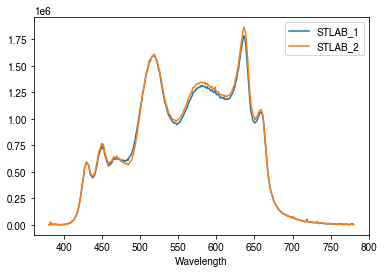

[ 0.55995116  0.55995116  0.55995116  0.55995116  0.55995116  0.55995116
  0.55995116  0.55995116  0.55995116  0.55995116]


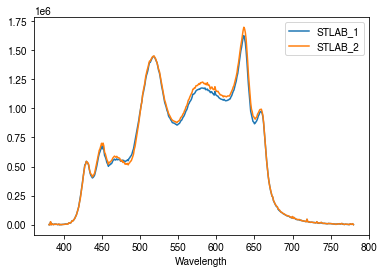

[ 0.4998779  0.4998779  0.4998779  0.4998779  0.4998779  0.4998779
  0.4998779  0.4998779  0.4998779  0.4998779]


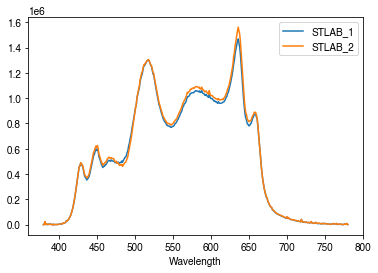

[ 0.43980464  0.43980464  0.43980464  0.43980464  0.43980464  0.43980464
  0.43980464  0.43980464  0.43980464  0.43980464]


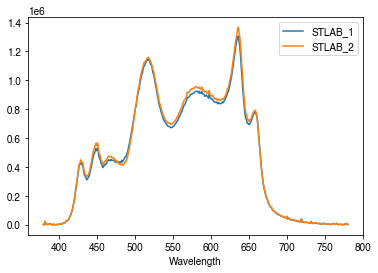

[ 0.38046398  0.38046398  0.38046398  0.38046398  0.38046398  0.38046398
  0.38046398  0.38046398  0.38046398  0.38046398]


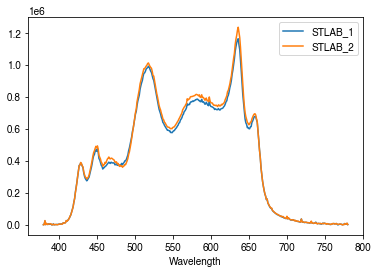

[ 0.32307692  0.32307692  0.32307692  0.32307692  0.32307692  0.32307692
  0.32307692  0.32307692  0.32307692  0.32307692]


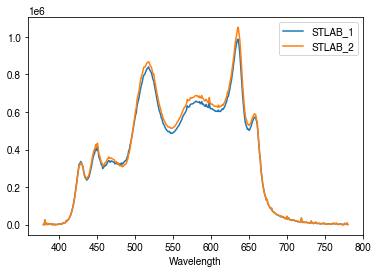

[ 0.26862027  0.26862027  0.26862027  0.26862027  0.26862027  0.26862027
  0.26862027  0.26862027  0.26862027  0.26862027]


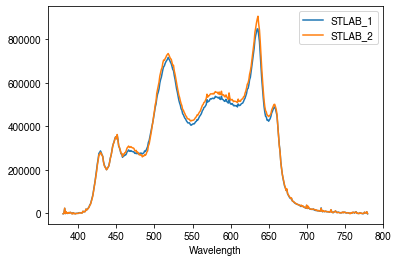

[ 0.21782662  0.21782662  0.21782662  0.21782662  0.21782662  0.21782662
  0.21782662  0.21782662  0.21782662  0.21782662]


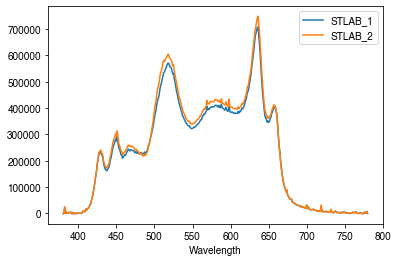

[ 0.17118437  0.17118437  0.17118437  0.17118437  0.17118437  0.17118437
  0.17118437  0.17118437  0.17118437  0.17118437]


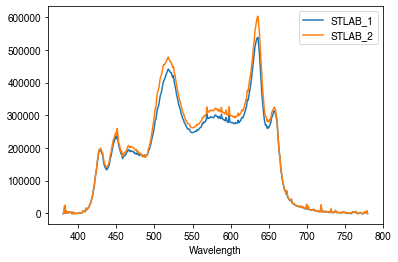

[ 0.12991453  0.12991453  0.12991453  0.12991453  0.12991453  0.12991453
  0.12991453  0.12991453  0.12991453  0.12991453]


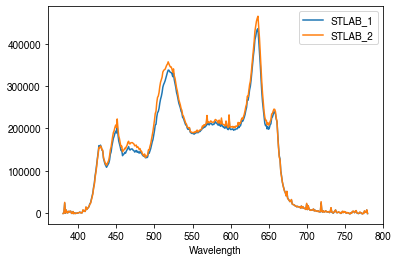

[ 0.09450549  0.09450549  0.09450549  0.09450549  0.09450549  0.09450549
  0.09450549  0.09450549  0.09450549  0.09450549]


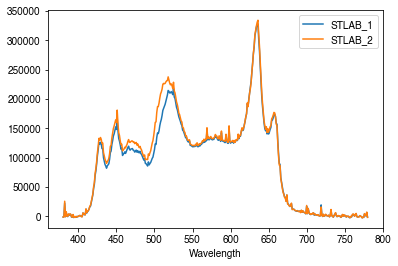

[ 0.06544567  0.06544567  0.06544567  0.06544567  0.06544567  0.06544567
  0.06544567  0.06544567  0.06544567  0.06544567]


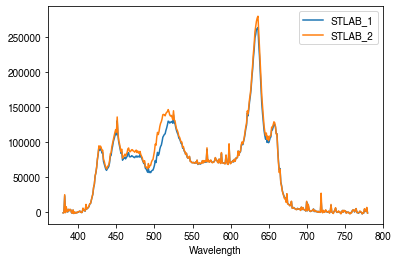

[ 0.04346764  0.04346764  0.04346764  0.04346764  0.04346764  0.04346764
  0.04346764  0.04346764  0.04346764  0.04346764]


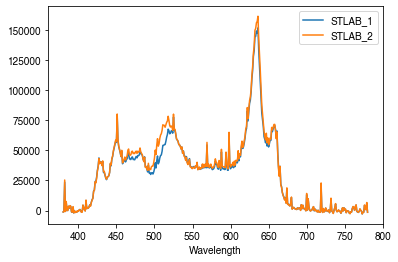

[ 0.02832723  0.02832723  0.02832723  0.02832723  0.02832723  0.02832723
  0.02832723  0.02832723  0.02832723  0.02832723]


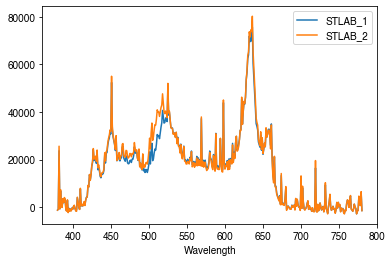

[ 0.02075702  0.02075702  0.02075702  0.02075702  0.02075702  0.02075702
  0.02075702  0.02075702  0.02075702  0.02075702]


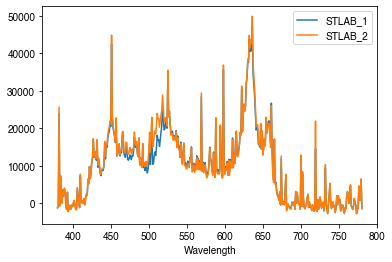

In [5]:
from itertools import product

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from pysilsub.device import StimulationDevice
from pyplr import stlabhelp

Fs = 100
MINTENSITY = 0
MAXTENSITY = 4095
BACKGROUND = MAXTENSITY/2

S1 = StimulationDevice.from_json('/Users/jtm545/Projects/PySilSub/data/STLAB_1_York.json')
S2 = StimulationDevice.from_json('/Users/jtm545/Projects/PySilSub/data/STLAB_2_York.json')

frequencies = [2.0]
contrasts = [.96]

for f, c in product(frequencies, contrasts):
    
    # A complete cycle
    x = stlabhelp.sinusoid_modulation(f, 1/f, Fs)
    
    # Only solve for what we need
    peak_idx = x.argmax()
    trough_idx = x.argmin()
    s1_settings = x[peak_idx:trough_idx+1]
    s1_settings = s1_settings / MAXTENSITY
    
    plt.plot(s1_settings)
    plt.show()
    
    for s in s1_settings:
        x0 = np.tile(s, 10)
        print(x0)
        s1_spd = S1.predict_multiprimary_spd(x0, 'STLAB_1').plot()
        s2_spd = S2.predict_multiprimary_spd(x0, 'STLAB_2').plot()
        plt.legend()
        plt.show()
        
        

